## Telecom churn prediction

Customer churn means the customer attrition rate in an enterprise. i.e customers ending their contract or canceling their subscription service. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Problem statement:

Given three months of  customer’s telephonic data. We need  to predict  the customer   churn  in  the next month. 

This  analysis helps companies to identify the cause of churn and implement effective strategies for  customer retention.

It is much less expensive to retain existing customers than it is to acquire new customers. 
predicting churn in the telecom industry is very important.



### Dataset level analysis:

Data Analysis is one of the most important steps in solving any Machine Learning problem.
As the very first step, let’s import the required libraries to solve this problem.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure
from scipy import stats
from scipy.stats import zscore
from IPython import get_ipython

### Loading the data:

Data set is in the format of a csv file. Load the data from “telecom_churn_data.csv” to a pandas dataframe.


In [2]:
# read the data

churn_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
# shape of data
churn_data.shape

(99999, 226)

There are 99999 data points(rows) and 226 features(columns) in dataset.
                                              

In [4]:
# Display all Columns of data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


In [5]:
#print first five rows of data
churn_data.head(5)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [6]:
# columns of dataset

churn_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [7]:
print(churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


#### observaton:
There are 214  numeric  and  12 non numeric columns.

In [8]:
# observe the data type of  each column

churn_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

#### observation:
The 12 non numeric columns have datetime values.  
columns with date time values represented as object,they can be converted into date_time format.

In [9]:
# print  columns with datetime represented as object 

date = churn_data.select_dtypes(include=['object'])
print(" columns with date time format represented as  object\n",date.columns)

#converting these dateime cols to datetime format
for col in date.columns:
    churn_data[col] = pd.to_datetime(churn_data[col])

 columns with date time format represented as  object
 Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


In [10]:
# datatypes after converting to datetime columns
churn_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   circle_id                 int64         
 2   loc_og_t2o_mou            float64       
 3   std_og_t2o_mou            float64       
 4   loc_ic_t2o_mou            float64       
 5   last_date_of_month_6      datetime64[ns]
 6   last_date_of_month_7      datetime64[ns]
 7   last_date_of_month_8      datetime64[ns]
 8   last_date_of_month_9      datetime64[ns]
 9   arpu_6                    float64       
 10  arpu_7                    float64       
 11  arpu_8                    float64       
 12  arpu_9                    float64       
 13  onnet_mou_6               float64       
 14  onnet_mou_7               float64       
 15  onnet_mou_8               float64       
 16  onnet_mou_9               float64       
 17  offnet_mou_

In [11]:
# some statistical information about features.
churn_data.describe().T.head()

count          mean           std           min  \
mobile_number   99999.0  7.001207e+09  695669.38629  7.000000e+09   
circle_id       99999.0  1.090000e+02       0.00000  1.090000e+02   
loc_og_t2o_mou  98981.0  0.000000e+00       0.00000  0.000000e+00   
std_og_t2o_mou  98981.0  0.000000e+00       0.00000  0.000000e+00   
loc_ic_t2o_mou  98981.0  0.000000e+00       0.00000  0.000000e+00   

                         25%           50%           75%           max  
mobile_number   7.000606e+09  7.001205e+09  7.001812e+09  7.002411e+09  
circle_id       1.090000e+02  1.090000e+02  1.090000e+02  1.090000e+02  
loc_og_t2o_mou  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
std_og_t2o_mou  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
loc_ic_t2o_mou  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00

#### preprocessing data:

In [12]:
# check for unique values in data
unique_col = [col for col in churn_data.columns if churn_data[col].nunique() == 1]

print(len(unique_col))

print( "\n columns with unique value in data set:","\n", unique_col)

16

 columns with unique value in data set: 
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


observation:

There are 16 unique value columns. These columns have no variance in data. so we drop those unique value columns.

In [13]:
# Drop the unique value columns
churn_data.drop(unique_col, axis=1, inplace = True)

In [14]:
# shape of data after dropimg  unique columns
churn_data.shape

(99999, 210)

### Handling missing values

In [15]:
#checking for missing values in data
churn_data.isna().any().any()


True

 There are lot of missing values in data. These missing values can be handled by using some imputation techniques.

In [16]:
# checking for percentage of missing in each column
missing = churn_data.isnull().sum() * 100 / churn_data.shape[0]


# no of missing values in each columna
number_missing = churn_data.isnull().sum()



In [17]:
# print missing values and % of missing in a data frame
missing_columns = pd.DataFrame({'column': churn_data.columns,
                               'No_of_missing_val':number_missing,
                               'Missing_percentage':missing}).set_index('column').reset_index()
missing_columns

column  No_of_missing_val  Missing_percentage
0               mobile_number                  0            0.000000
1                      arpu_6                  0            0.000000
2                      arpu_7                  0            0.000000
3                      arpu_8                  0            0.000000
4                      arpu_9                  0            0.000000
5                 onnet_mou_6               3937            3.937039
6                 onnet_mou_7               3859            3.859039
7                 onnet_mou_8               5378            5.378054
8                 onnet_mou_9               7745            7.745077
9                offnet_mou_6               3937            3.937039
10               offnet_mou_7               3859            3.859039
11               offnet_mou_8               5378            5.378054
12               offnet_mou_9               7745            7.745077
13              roam_ic_mou_6               3937            3.937039
14              roam_ic_mou_7               3859            3.859039
15              roam_ic_mou_8               5378            5.378054
16              roam_ic_mou_9               7745            7.745077
17              roam_og_mou_6               3937            3.937039
18              roam_og_mou_7               3859            3.859039
19              roam_og_mou_8               5378            5.378054
20              roam_og_mou_9               7745            7.745077
21           loc_og_t2t_mou_6               3937            3.937039
22           loc_og_t2t_mou_7               3859            3.859039
23           loc_og_t2t_mou_8               5378            5.378054
24           loc_og_t2t_mou_9               7745            7.745077
25           loc_og_t2m_mou_6               3937            3.937039
26           loc_og_t2m_mou_7               3859            3.859039
27           loc_og_t2m_mou_8               5378            5.378054
28           loc_og_t2m_mou_9               7745            7.745077
29           loc_og_t2f_mou_6               3937            3.937039
30           loc_og_t2f_mou_7               3859            3.859039
31           loc_og_t2f_mou_8               5378            5.378054
32           loc_og_t2f_mou_9               7745            7.745077
33           loc_og_t2c_mou_6               3937            3.937039
34           loc_og_t2c_mou_7               3859            3.859039
35           loc_og_t2c_mou_8               5378            5.378054
36           loc_og_t2c_mou_9               7745            7.745077
37               loc_og_mou_6               3937            3.937039
38               loc_og_mou_7               3859            3.859039
39               loc_og_mou_8               5378            5.378054
40               loc_og_mou_9               7745            7.745077
41           std_og_t2t_mou_6               3937            3.937039
42           std_og_t2t_mou_7               3859            3.859039
43           std_og_t2t_mou_8               5378            5.378054
44           std_og_t2t_mou_9               7745            7.745077
45           std_og_t2m_mou_6               3937            3.937039
46           std_og_t2m_mou_7               3859            3.859039
47           std_og_t2m_mou_8               5378            5.378054
48           std_og_t2m_mou_9               7745            7.745077
49           std_og_t2f_mou_6               3937            3.937039
50           std_og_t2f_mou_7               3859            3.859039
51           std_og_t2f_mou_8               5378            5.378054
52           std_og_t2f_mou_9               7745            7.745077
53               std_og_mou_6               3937            3.937039
54               std_og_mou_7               3859            3.859039
55               std_og_mou_8               5378            5.378054
56               std_og_mou_9               7745            7.745077
57               isd_

In [18]:
#print missing percentage in each column.
percent_missing = churn_data.isna().sum()/(len(churn_data))*100
percent_missing.sort_values(ascending = False)



night_pck_user_6            74.846748
arpu_2g_6                   74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
count_rech_2g_6             74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
date_of_last_rech_data_6    74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
night_pck_user_7            74.428744
arpu_2g_7                   74.428744
total_rech_data_7           74.428744
arpu_3g_7                   74.428744
max_rech_data_7             74.428744
av_rech_amt_data_7          74.428744
count_rech_3g_7             74.428744
date_of_last_rech_data_7    74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
date_of_last_rech_data_9    74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
av_rech_amt_data_9          74.077741
total_rech_d

#### observation

Lot of columns missing over 74% of data. impute those values by observing the data in each column.
some columns filled with  0 and some filled with 1

In [19]:
# checking for value counts of night pack user

print(churn_data['night_pck_user_6'].value_counts(),"\n" ,
      churn_data['night_pck_user_7'].value_counts())


0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64 
 0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64


 over 97% of night_pack values are zeros .Hence we fill these nan values with zeros





In [20]:
# fill nan values with zeros

night_pck_cols = [col for col in churn_data.columns if 'night_pck_user_' in col]
print(night_pck_cols)

churn_data[night_pck_cols] = churn_data[night_pck_cols].apply(lambda x: x.fillna(0))

churn_data[night_pck_cols].head(5)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9']


night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9
0               0.0               0.0               0.0               0.0
1               0.0               0.0               0.0               0.0
2               0.0               0.0               0.0               0.0
3               0.0               0.0               0.0               0.0
4               0.0               0.0               0.0               0.0

In [21]:
# checking for value counts fb_user


print(churn_data['fb_user_6'].value_counts(),"\n" ,
      churn_data['fb_user_7'].value_counts())



1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64 
 1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64


 over 90% of the values of fb_user columns  are 1. Hence we fill nan values with 1's.

In [22]:
# Fill nan values with 1
fb_user_cols = [col for col in churn_data.columns if 'fb_user_' in col]
print(fb_user_cols)

churn_data[fb_user_cols] = churn_data[fb_user_cols].apply(lambda x: x.fillna(1))

churn_data[fb_user_cols].head(5)


['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


fb_user_6  fb_user_7  fb_user_8  fb_user_9
0        1.0        1.0        1.0        1.0
1        1.0        1.0        1.0        1.0
2        1.0        1.0        1.0        1.0
3        1.0        1.0        1.0        1.0
4        0.0        1.0        1.0        1.0

In [23]:
churn_data.isnull().sum() * 100 / churn_data.shape[0]
churn_data.shape


(99999, 210)

In [24]:
print(churn_data['total_rech_data_6'].min(),"\n" ,
      churn_data['total_rech_data_7'].min())



1.0 
 1.0


In [25]:
total_rech_cols = [col for col in churn_data.columns if 'total_rech_data_' in col]
print(total_rech_cols)

churn_data[total_rech_cols] = churn_data[total_rech_cols].apply(lambda x: x.fillna(0))

churn_data[total_rech_cols].head(5)



['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9
0                1.0                1.0                1.0                0.0
1                0.0                1.0                2.0                0.0
2                0.0                0.0                0.0                1.0
3                0.0                0.0                0.0                0.0
4                1.0                0.0                0.0                0.0

In [26]:
print(churn_data['max_rech_data_8'].min(),"\n" ,
      churn_data['max_rech_data_7'].min())



1.0 
 1.0


In [27]:
max_rech_cols = [col for col in churn_data.columns if 'max_rech_data_' in col]
print(max_rech_cols)

churn_data[max_rech_cols] = churn_data[max_rech_cols].apply(lambda x: x.fillna(0))

churn_data[max_rech_cols].head(5)



['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']


max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9
0            252.0            252.0            252.0              0.0
1              0.0            154.0             25.0              0.0
2              0.0              0.0              0.0             46.0
3              0.0              0.0              0.0              0.0
4             56.0              0.0              0.0              0.0

 Filling the maximum recharge data and total recharge data with 0 means customer didn't make any recharge.

In [28]:
# list of some recharge columns
rech_cols = []
for col in churn_data.columns:
    if 'count_rech_' in col or 'av_rech_amt_' in col:
        rech_cols.append(col)
rech_cols

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [29]:
# impute these rech_cols  with zero
churn_data[rech_cols] = churn_data[rech_cols].apply(lambda x: x.fillna(0))

In [30]:
churn_data[rech_cols].head()

count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  \
0              0.0              0.0              0.0              0.0   
1              0.0              1.0              2.0              0.0   
2              0.0              0.0              0.0              1.0   
3              0.0              0.0              0.0              0.0   
4              1.0              0.0              0.0              0.0   

   count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  \
0              1.0              1.0              1.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
0               252.0               252.0               252.0   
1                 0.0               154.0                50.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                56.0                 0.0                 0.0   

   av_rech_amt_data_9  
0                 0.0  
1                 0.0  
2                46.0  
3                 0.0  
4                 0.0

In [31]:
percent_missing = churn_data.isna().sum()/(len(churn_data))*100
percent_missing.sort_values(ascending = False)



date_of_last_rech_data_6    74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
arpu_2g_7                   74.428744
arpu_3g_7                   74.428744
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_9    74.077741
arpu_3g_9                   74.077741
arpu_2g_9                   74.077741
arpu_2g_8                   73.660737
arpu_3g_8                   73.660737
date_of_last_rech_data_8    73.660737
og_others_9                  7.745077
loc_og_t2c_mou_9             7.745077
std_ic_t2t_mou_9             7.745077
std_ic_t2m_mou_9             7.745077
std_ic_t2f_mou_9             7.745077
loc_ic_t2t_mou_9             7.745077
spl_ic_mou_9                 7.745077
loc_ic_t2m_mou_9             7.745077
loc_og_t2m_mou_9             7.745077
loc_og_t2f_mou_9             7.745077
loc_og_mou_9                 7.745077
spl_og_mou_9                 7.745077
std_og_t2t_mou_9             7.745077
std_og_t2m_mou_9             7.745077
std_og_t2f_m

 By observing the date columns 74% of 'date_of_last_rech_data_', 'date_of_last_rech_' column  values missing.
we can fill those with  first date of every month.

In [32]:
# Date of last recharge column fill with first date of month
churn_data['date_of_last_rech_data_6'].fillna('6/1/2014',inplace=True)
churn_data['date_of_last_rech_data_7'].fillna('7/1/2014',inplace=True)
churn_data['date_of_last_rech_data_8'].fillna('8/1/2014',inplace=True)
churn_data['date_of_last_rech_data_9'].fillna('9/1/2014',inplace=True)


In [33]:
# Date of last recharge column fill with first date of month
churn_data['date_of_last_rech_6'].fillna('6/1/2014',inplace=True)
churn_data['date_of_last_rech_7'].fillna('7/1/2014',inplace=True)
churn_data['date_of_last_rech_8'].fillna('8/1/2014',inplace=True)
churn_data['date_of_last_rech_9'].fillna('9/1/2014',inplace=True)



In [34]:
# Checking the related columns values
churn_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)


arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
0     212.17     212.17               252.0
1        NaN        NaN                 0.0
2        NaN        NaN                 0.0
3        NaN        NaN                 0.0
4       0.00       0.00                56.0
5        NaN        NaN                 0.0
6        NaN        NaN                 0.0
7        NaN        NaN                 0.0
8        NaN        NaN                 0.0
9        NaN        NaN                 0.0

In [35]:

arpu = churn_data.iloc[:,1:4]



In [36]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9

print("Correlation  for month 6\n\n")
print( churn_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation  for month 7")
print( churn_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation  for month 8")
print( churn_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation for month 9")
print(churn_data[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())


Correlation  for month 6


                    arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Correlation  for month 7
                    arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Correlation  for month 8
                    arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000

Correlation for month 9
                    arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9            0.852253   1.000000  

 From the above correlation table between attributes arpu_2g_* and arpu_3g_* for each month from 6 to 9 respectively
 is highly correlated to the attribute av_rech_amt_data_* for each month from 6 to 9 respectively.

Considering the high correlation between them, it is safer to drop the attributes arpu_2g_* and arpu_3g_*.



In [37]:
arpu_cols = []
for col in churn_data.columns:
    if 'arpu_3g_' in col or 'arpu_2g_' in col:
        arpu_cols.append(col)
arpu_cols

['arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [38]:
churn_data.drop(arpu_cols, axis = 1, inplace = True)

In [39]:
# shape of data after droping arpu_ columns
churn_data.shape

(99999, 202)

In [40]:
# print missing values after droping some columns
percent_missing = churn_data.isna().sum()/(len(churn_data))*100
percent_missing.sort_values(ascending = False)



std_ic_t2f_mou_9            7.745077
roam_ic_mou_9               7.745077
spl_ic_mou_9                7.745077
loc_og_mou_9                7.745077
loc_og_t2f_mou_9            7.745077
spl_og_mou_9                7.745077
isd_ic_mou_9                7.745077
loc_ic_t2m_mou_9            7.745077
loc_og_t2m_mou_9            7.745077
std_og_t2t_mou_9            7.745077
loc_og_t2t_mou_9            7.745077
ic_others_9                 7.745077
std_ic_mou_9                7.745077
roam_og_mou_9               7.745077
std_og_t2m_mou_9            7.745077
loc_ic_t2f_mou_9            7.745077
loc_og_t2c_mou_9            7.745077
onnet_mou_9                 7.745077
og_others_9                 7.745077
loc_ic_t2t_mou_9            7.745077
offnet_mou_9                7.745077
loc_ic_mou_9                7.745077
std_ic_t2m_mou_9            7.745077
isd_og_mou_9                7.745077
std_og_t2f_mou_9            7.745077
std_ic_t2t_mou_9            7.745077
std_og_mou_9                7.745077
l

In [41]:
#churn_data.describe().T

### Filtering high value customers

High value customers can be filtered by using the revenue generated by them in previous months.

In [42]:
 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
churn_data['total_rech_amt_data_6'] = churn_data['av_rech_amt_data_6'] * churn_data['total_rech_data_6']
churn_data['total_rech_amt_data_7'] = churn_data['av_rech_amt_data_7'] * churn_data['total_rech_data_7']
churn_data['total_rech_amt_data_8'] = churn_data['av_rech_amt_data_8'] * churn_data['total_rech_data_8']
churn_data['total_rech_amt_data_9'] = churn_data['av_rech_amt_data_9'] * churn_data['total_rech_data_9']

drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                "av_rech_amt_data_6", 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
churn_data.drop(drop_col, axis=1, inplace=True)

print(churn_data.shape)


(99999, 198)


In [43]:
# Calculating the overall recharge amount for the months 6,7,8 and 9
churn_data['overall_rech_amt_6'] = churn_data['total_rech_amt_data_6'] + churn_data['total_rech_amt_6']
churn_data['overall_rech_amt_7'] = churn_data['total_rech_amt_data_7'] + churn_data['total_rech_amt_7']


# Calculating the average recharge done by customer in months 6 and 7
churn_data['avg_rech_amt_6_7'] = (churn_data['overall_rech_amt_6'] + churn_data['overall_rech_amt_7'])/2



In [44]:
percent_missing = churn_data.isna().sum()/(len(churn_data))*100
percent_missing.sort_values(ascending = False)



std_ic_t2f_mou_9            7.745077
roam_ic_mou_9               7.745077
spl_ic_mou_9                7.745077
loc_og_t2f_mou_9            7.745077
spl_og_mou_9                7.745077
loc_og_mou_9                7.745077
isd_ic_mou_9                7.745077
loc_og_t2m_mou_9            7.745077
loc_ic_t2m_mou_9            7.745077
std_og_t2t_mou_9            7.745077
loc_og_t2t_mou_9            7.745077
std_ic_mou_9                7.745077
ic_others_9                 7.745077
roam_og_mou_9               7.745077
std_og_t2m_mou_9            7.745077
loc_og_t2c_mou_9            7.745077
loc_ic_t2t_mou_9            7.745077
loc_ic_t2f_mou_9            7.745077
std_ic_t2t_mou_9            7.745077
offnet_mou_9                7.745077
loc_ic_mou_9                7.745077
std_ic_t2m_mou_9            7.745077
isd_og_mou_9                7.745077
std_og_mou_9                7.745077
onnet_mou_9                 7.745077
std_og_t2f_mou_9            7.745077
og_others_9                 7.745077
o

In [45]:
churn_data.shape

(99999, 201)

# Define churn variable

In [46]:
# Selecting the columns to define churn variable as  TARGET Variable

churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

print(churn_col)
churn_data[churn_col].info()

['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  99999 non-null  float64
 1   total_og_mou_9  99999 non-null  float64
 2   vol_2g_mb_9     99999 non-null  float64
 3   vol_3g_mb_9     99999 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [47]:

# Add churn column to data
churn_data['churn']=np.nan

# Imputing the churn values based on the condition
churn_data['churn'] = np.where(churn_data[churn_col].sum(axis=1) == 0, 1, 0)

churn_data['churn'].head()


0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

0    89.808898
1    10.191102
Name: churn, dtype: float64


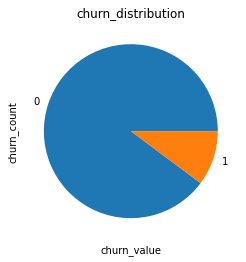

In [48]:
# lets find out churn/non churn percentage
print((churn_data['churn'].value_counts()/len(churn_data))*100)
((churn_data['churn'].value_counts()/len(churn_data))*100).plot(kind="pie")
plt.title("churn_distribution")
plt.xlabel("churn_value")
plt.ylabel("churn_count")
plt.show()


### observation:
By observing the above graph over 92% of customers are not churned. only 8% are in churned state.

In [49]:
churn_data.shape

(99999, 202)

In [50]:
churn_cols = [col for col in churn_data.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_cols)


The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_amt_data_9']


In [51]:
# Dropping the selected churn phase columns
churn_data.drop(churn_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
churn_data.shape


(99999, 154)

In [52]:
percent_missing = churn_data.isna().sum()/(len(churn_data))*100
percent_missing.sort_values(ascending = False)

std_og_mou_8                5.378054
isd_ic_mou_8                5.378054
loc_ic_mou_8                5.378054
std_og_t2m_mou_8            5.378054
isd_og_mou_8                5.378054
std_og_t2t_mou_8            5.378054
spl_og_mou_8                5.378054
loc_og_mou_8                5.378054
og_others_8                 5.378054
loc_og_t2c_mou_8            5.378054
loc_ic_t2t_mou_8            5.378054
loc_og_t2f_mou_8            5.378054
loc_ic_t2m_mou_8            5.378054
loc_og_t2m_mou_8            5.378054
std_og_t2f_mou_8            5.378054
loc_og_t2t_mou_8            5.378054
ic_others_8                 5.378054
roam_og_mou_8               5.378054
onnet_mou_8                 5.378054
std_ic_t2t_mou_8            5.378054
spl_ic_mou_8                5.378054
roam_ic_mou_8               5.378054
std_ic_t2m_mou_8            5.378054
loc_ic_t2f_mou_8            5.378054
offnet_mou_8                5.378054
std_ic_mou_8                5.378054
std_ic_t2f_mou_8            5.378054
s

In [53]:
#  reduce some columns by  Merging local og calls
churn_data['loc_og_mou_t_6']=churn_data['loc_og_t2t_mou_6']+churn_data['loc_og_t2m_mou_6']+churn_data['loc_og_t2f_mou_6']+churn_data['loc_og_t2c_mou_6']
churn_data['loc_og_mou_t_7']=churn_data['loc_og_t2t_mou_7']+churn_data['loc_og_t2m_mou_7']+churn_data['loc_og_t2f_mou_7']+churn_data['loc_og_t2c_mou_7']
churn_data['loc_og_mou_t_8']=churn_data['loc_og_t2t_mou_8']+churn_data['loc_og_t2m_mou_8']+churn_data['loc_og_t2f_mou_8']+churn_data['loc_og_t2c_mou_8']

churn_data.drop(columns=['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8'],inplace=True)



In [54]:
churn_data.shape

(99999, 145)

In [55]:
#percent_missing = churn_data.isna().sum()/(len(churn_data))*100
#percent_missing.sort_values(ascending = False)

In [56]:

# Merging the std_og calls
churn_data['std_og_mou_t_6']=churn_data['std_og_t2t_mou_6']+churn_data['std_og_t2m_mou_6']+churn_data['std_og_t2f_mou_6']
churn_data['std_og_mou_t_7']=churn_data['std_og_t2t_mou_7']+churn_data['std_og_t2m_mou_7']+churn_data['std_og_t2f_mou_7']
churn_data['std_og_mou_t_8']=churn_data['std_og_t2t_mou_8']+churn_data['std_og_t2m_mou_8']+churn_data['std_og_t2f_mou_8']

churn_data.drop(columns=['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8'],inplace=True)

# Merging the local ic calls
churn_data['loc_ic_mou_t_6']=churn_data['loc_ic_t2t_mou_6']+churn_data['loc_ic_t2m_mou_6']+churn_data['loc_ic_t2f_mou_6']
churn_data['loc_ic_mou_t_7']=churn_data['loc_ic_t2t_mou_7']+churn_data['loc_ic_t2m_mou_7']+churn_data['loc_ic_t2f_mou_7']
churn_data['loc_ic_mou_t_8']=churn_data['loc_ic_t2t_mou_8']+churn_data['loc_ic_t2m_mou_8']+churn_data['loc_ic_t2f_mou_8']

churn_data.drop(columns=['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8'],inplace=True)

# Merging the std ic calls
churn_data['std_ic_mou_t_6']=churn_data['std_ic_t2t_mou_6']+churn_data['std_ic_t2m_mou_6']+churn_data['std_ic_t2f_mou_6']
churn_data['std_ic_mou_t_7']=churn_data['std_ic_t2t_mou_7']+churn_data['std_ic_t2m_mou_7']+churn_data['std_ic_t2f_mou_7']
churn_data['std_ic_mou_t_8']=churn_data['std_ic_t2t_mou_8']+churn_data['std_ic_t2m_mou_8']+churn_data['std_ic_t2f_mou_8']

churn_data.drop(columns=['std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8'],inplace=True)


In [57]:
churn_data.shape

(99999, 127)

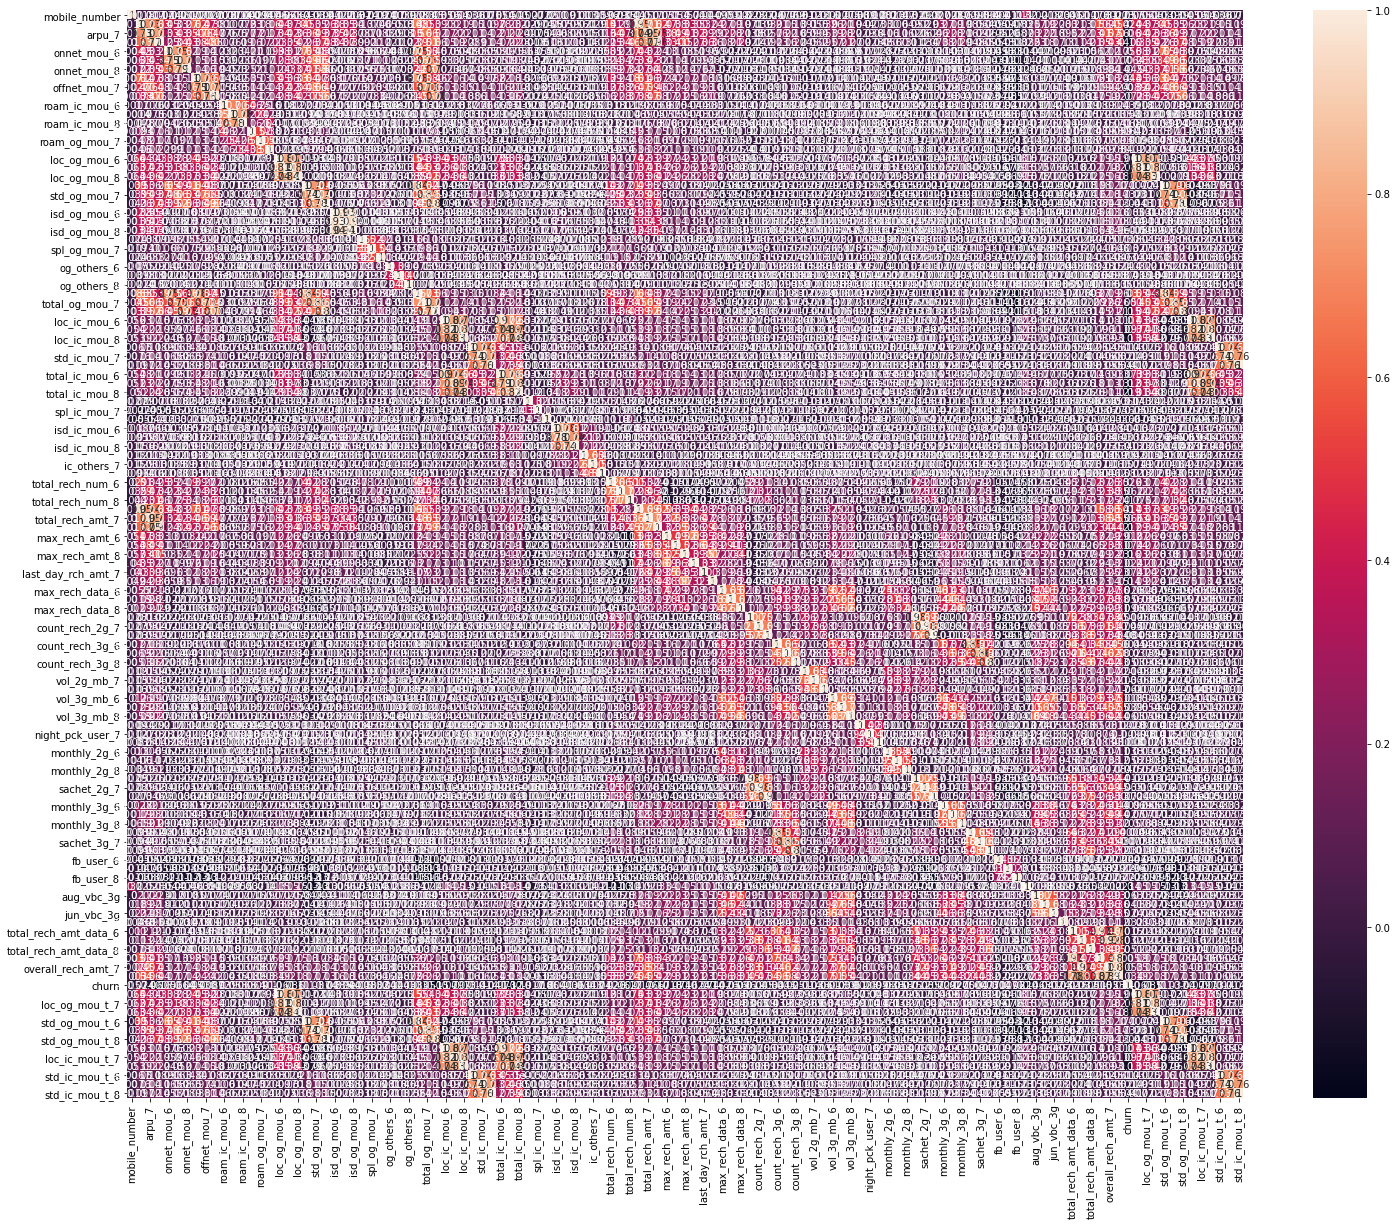

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 20))
sns.heatmap(churn_data.corr(), annot=True)

plt.show()




  By observing the above heatmap lot of features are correlated.

In [59]:
churn_data.shape

(99999, 127)

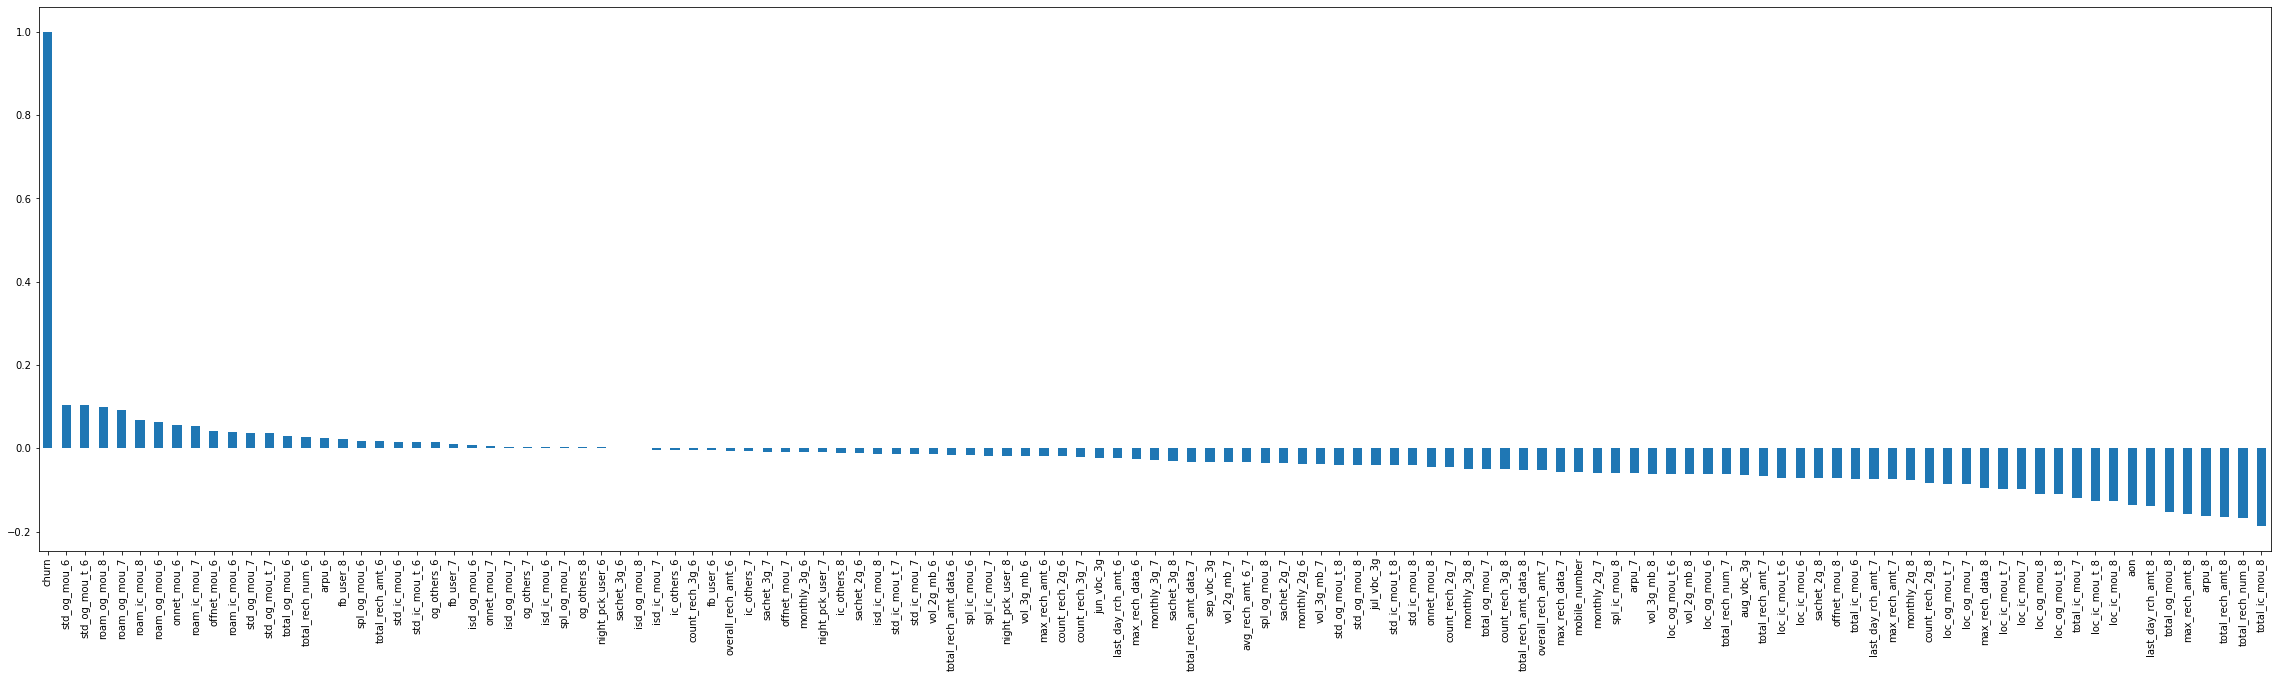

In [60]:
# Correlation of "Churn" with other variables:
plt.figure(figsize=(40,10))
churn_data.corr()['churn'].sort_values(ascending = False).plot(kind='bar')


### observation:
By observing the above plot the features total_ic_mou,total_rech_num,max_rech_amt,total_og_mou,
   last_day_rech_amt of month 8 are negatively correlated with churn variable.
  std_og_mou,onnet_mou,roam_og_mou,offnet_mou features of moth 6 are positively correlated with churn.

### univariate analysis

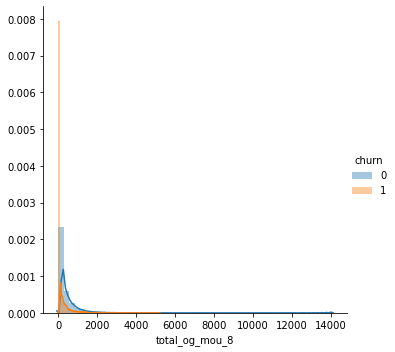

In [61]:
# Distribution plot of total_og_mou_8
sns.FacetGrid(churn_data, hue = 'churn', height = 5)\
    .map(sns.distplot,'total_og_mou_8')\
    .add_legend()
plt.show()

#### observation:
churned customers make less number of outgoing minutes of usage in 8 th month.

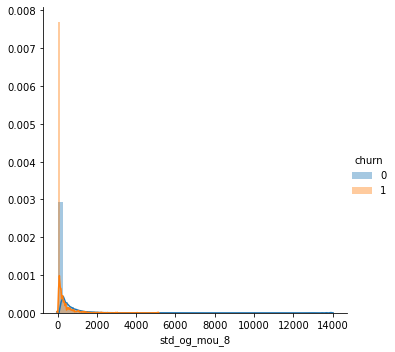

In [62]:
#distribution plot
sns.FacetGrid(churn_data, hue = 'churn', height = 5)\
    .map(sns.distplot,'std_og_mou_8')\
    .add_legend()
plt.show()

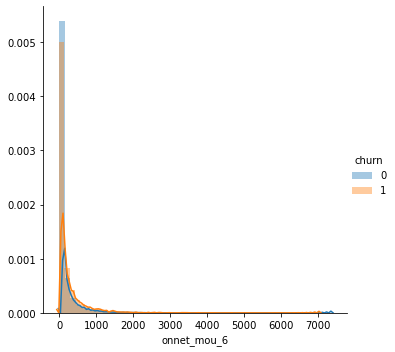

In [63]:
# distribution plot of onnet_mou_6
sns.FacetGrid(churn_data, hue = 'churn', height = 5)\
    .map(sns.distplot,'onnet_mou_6')\
    .add_legend()
plt.show()

#### observation:
overlap between churn and non churn customers of netusage in month 6

D:\bhavagna\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\bhavagna\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


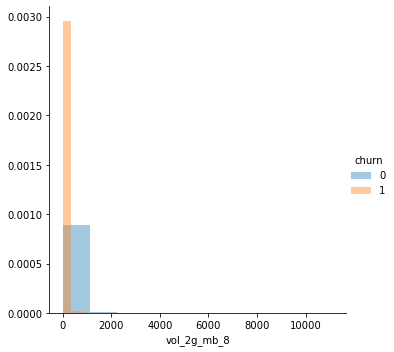

In [64]:
# distribution of 3g net usage

sns.FacetGrid(churn_data, hue = 'churn', height = 5)\
    .map(sns.distplot,'vol_2g_mb_8',bins = 10)\
    .add_legend()
plt.show()

#### observation:
   churned customers use less 2g mobile intenet usage in month 8 almost close top zero.

D:\bhavagna\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\bhavagna\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


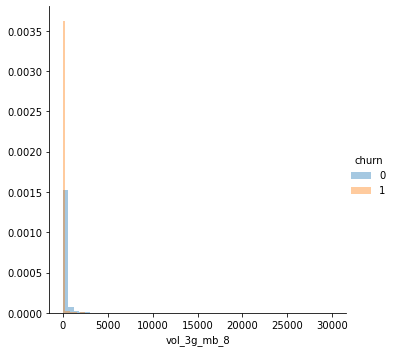

In [65]:
# plot of vol_3g_mb_8
sns.FacetGrid(churn_data, hue = 'churn', height = 5)\
    .map(sns.distplot,'vol_3g_mb_8')\
    .add_legend()
plt.show()

#### observation:
    churned customers use less 3g mobile intenet usage in month 8 almost close top zero.

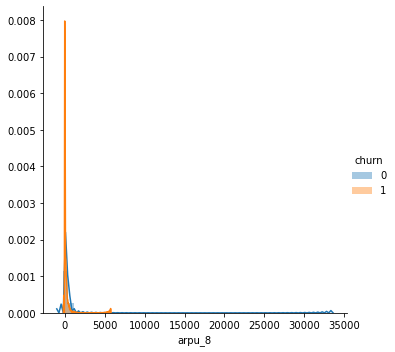

In [66]:
# plot of arpu_8
sns.FacetGrid(churn_data, hue = 'churn', height = 5)\
    .map(sns.distplot,'arpu_8')\
    .add_legend()
plt.show()

Most of the churned customers have produced a low revenue close to 0 in the eighth month. 
This feature can help slightly in distinguish but still a lot  overlapping between both.



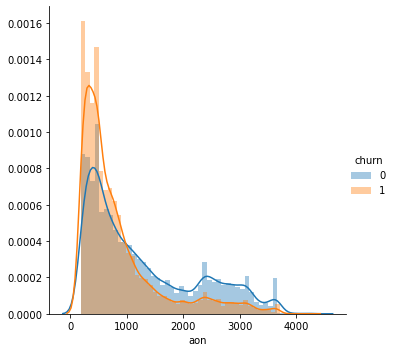

In [67]:
# distribution of aon
sns.FacetGrid(churn_data, hue = 'churn', height = 5)\
    .map(sns.distplot,'aon')\
    .add_legend()
plt.show()

lot of overlap in churned and non churned by using aon.


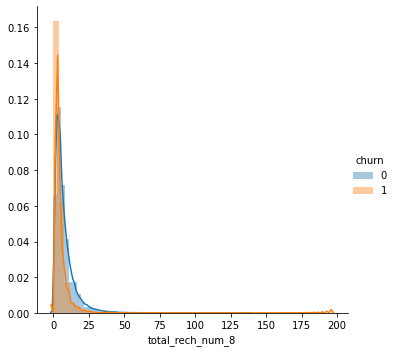

In [68]:
# plot of total_rech_num_8
sns.FacetGrid(churn_data, hue = 'churn', height = 5)\
    .map(sns.distplot,'total_rech_num_8')\
    .add_legend()
plt.show()


churned customers make less number of recharges in month 8.

### Bivariate analysis:

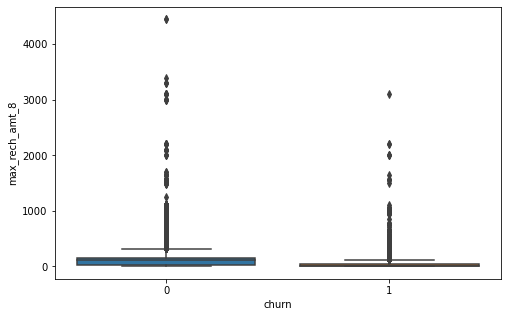

In [69]:
# plot of max_rech_amt_8
plt.figure(figsize=(8,5))
sns.boxplot( x = 'churn', y = 'max_rech_amt_8',data = churn_data)
plt.show()

#### observation:
    churned customers make less maximum recharge amount  in month 8.

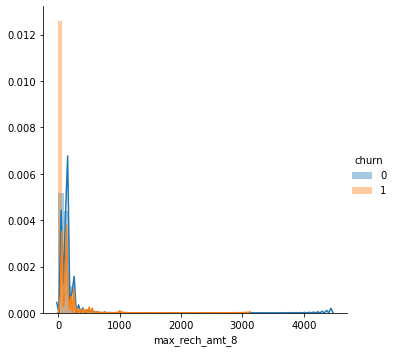

In [70]:
sns.FacetGrid(churn_data, hue = 'churn', height = 5)\
    .map(sns.distplot,'max_rech_amt_8')\
    .add_legend()
plt.show()

#### observation:
    churned customers make lowest recharge amount in month 8 almost equal to zero.

In [71]:
arpu = churn_data.iloc[:,1:4]
#arpu
arpu['churn'] = churn_data.churn

### Multivariate analysis:

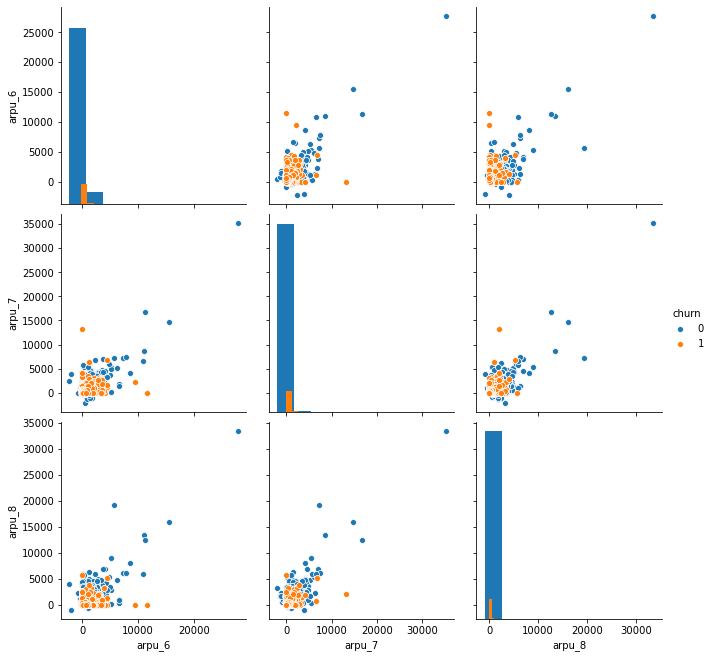

In [72]:
# bivariate distributions in a dataset, use pair plots 


import seaborn as sns
#plt.figure(figsize = (8,5))
sns.pairplot(arpu,hue = 'churn', height=3,diag_kind='hist')
plt.show()


#### observation:
     In the above pair plots, there is lot of overlaping.The churned customers have made a good revenue in one 
    month and not in other month.The diagonal histogram shows that most of the churned customers have values close to 0.



In [73]:
total_og=churn_data.iloc[:,31:34]
total_og['churn'] = churn_data.churn

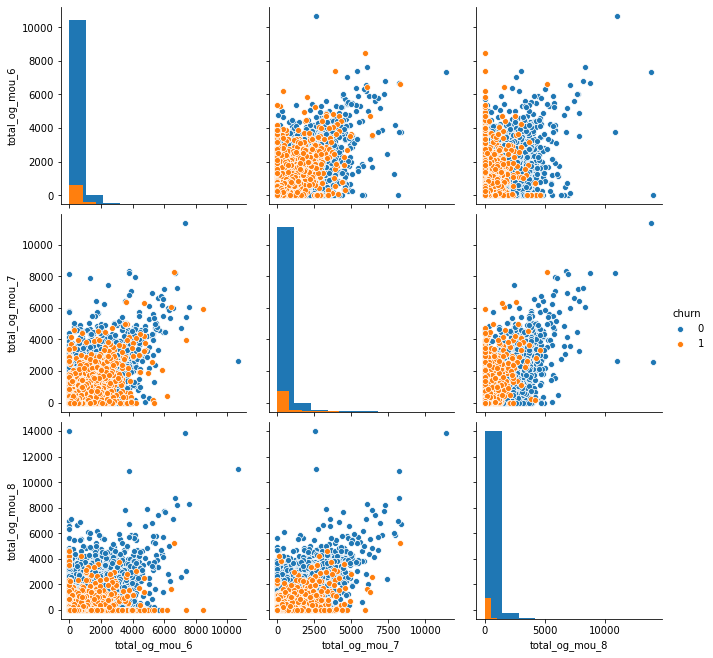

In [74]:
# Bivariate analysis of total_og and churn
sns.pairplot(total_og, hue="churn", height=3,diag_kind='hist')

#### observation:
    lot of overlaping in months 6 and 7.  
    By observing diagonal plots,total_og_mou of  churned customers for month 8 is lmost equal to zero.

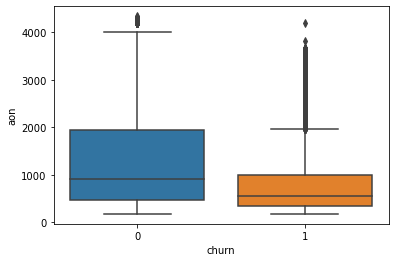

In [75]:
# plot of aon and churn
sns.boxplot(y = 'aon', x = 'churn', data = churn_data)

plt.show()

#### observation:
From the above plot , its clear that  tenured customers(who stay along network from long time) do not churn much.



In [76]:
churn_data.head()

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753  197.385  214.816  213.803          NaN          NaN   
1     7001865778   34.047  355.074  268.321        24.11        78.68   
2     7001625959  167.690  189.058  210.226        11.54        55.24   
3     7001204172  221.338  251.102  508.054        99.91        54.39   
4     7000142493  261.636  309.876  238.174        50.31       149.44   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00           NaN           NaN          0.00            NaN   
1         7.68         15.74         99.84        304.76            0.0   
2        37.26        143.33        220.59        208.36            0.0   
3       310.98        123.31        109.01         71.68            0.0   
4        83.89         76.96         91.88        124.26            0.0   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            NaN           0.00            NaN            NaN           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00           0.00            0.0           0.00           0.00   
3          54.86          44.38            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
0           NaN           NaN          0.00           NaN           NaN   
1         35.39        150.51        299.54          0.23          4.58   
2         60.66         67.41         67.66         47.64        108.68   
3        183.03        118.68         37.99         29.23         16.63   
4        117.96        241.33        208.16          9.31          0.00   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          0.00           NaN           NaN           0.0           NaN   
1          0.13           0.0           0.0           0.0          4.68   
2        120.94           0.0           0.0           0.0         46.56   
3        296.11           0.0           0.0           0.0         10.96   
4          0.00           0.0           0.0           0.0          0.00   

   spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0           NaN          0.00          NaN          NaN          0.0   
1         23.43         12.76         0.00          0.0          0.0   
2        236.84         96.84         0.45          0.0          0.0   
3          0.00         18.09         0.00          0.0          0.0   
4          0.00          0.00         0.00          0.0          0.0   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
0            0.00            0.00            0.00           NaN           NaN   
1           40.31          178.53          312.44         19.09        104.23   
2          155.33          412.94          285.46        229.56        208.86   
3          223.23          135.31          352.21        233.48        111.59   
4          127.28          241.33          208.16        214.03        198.04   

   loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
0          5.44           NaN           NaN          0.00            0.00   
1        408.43          5.90          0.00         14.84           26.83   
2        155.99        139.33        306.66        239.03          370.04   
3         48.18         45.99        105.01          4.94          280.08   
4        337.94          1.93          0.25          0.86          216.44   

   total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  \
0            0.00            5.44           NaN           NaN           0.0   
1          104.23          423.28          0.00           0.0           0.0   
2          519.53          395.03          0.21           0.0           0.0   
3          216.61           53.

In [77]:
#arpu = [col for col in churn_data.columns if 'arpu_' in col]

arpu = churn_data.iloc[:,1:4]
arpu['churn'] = churn_data.churn

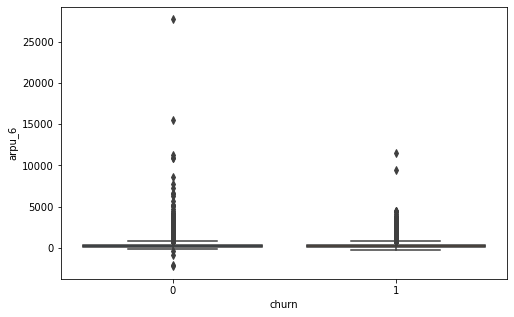

In [78]:
# plot of arpu_6 and churn
plt.figure(figsize=(8,5))

sns.boxplot(x = 'churn', y = 'arpu_6', data = arpu)
plt.show()

##### observation:
    lot of overlaping. Mean values looks like same for churned and non churned customers.

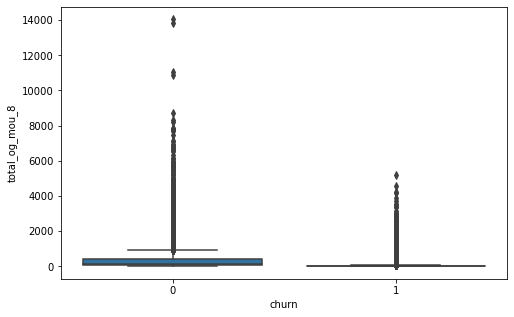

In [79]:
# plot for total_og_mou_8
plt.figure(figsize=(8,5))


sns.boxplot( x = 'churn', y = 'total_og_mou_8',data = churn_data)
plt.show()



 The total outgoing minutes of usage for churned customers almost equal to zero.

#### observations:
    
     For features like incoming,outgoing,recharge most of the churned customers have low values. Especially in the eighth month
     
     Recharge amounts distinguish churned customers better than the other features
     
     The pair plots show that the most of the churned customers have close to 0 value. 

     Multiple features representing the same task






### Featuring engineering

######  creating some new features based on existing ones for better analysis of data.

In [80]:
# separating date columns from dataframe
date_cols = []
for col in churn_data.columns:
    if 'date_of_last_rech_data_' in col or 'date_of_last_rech_' in col:
        date_cols.append(col)
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [81]:
# convert date filelds into date time format

churn_data['date_of_last_rech_6']=pd.to_datetime(churn_data['date_of_last_rech_6'])
churn_data['date_of_last_rech_7']=pd.to_datetime(churn_data['date_of_last_rech_7'])
churn_data['date_of_last_rech_8']=pd.to_datetime(churn_data['date_of_last_rech_8'])

churn_data['date_of_last_rech_data_6']=pd.to_datetime(churn_data['date_of_last_rech_data_6'])

churn_data['date_of_last_rech_data_7']=pd.to_datetime(churn_data['date_of_last_rech_data_7'])
churn_data['date_of_last_rech_data_8']=pd.to_datetime(churn_data['date_of_last_rech_data_8'])








In [82]:
#extracting date features
churn_data['last_rech_date_6']=churn_data['date_of_last_rech_6'].dt.day
churn_data['last_rech_date_7']=churn_data['date_of_last_rech_7'].dt.day
churn_data['last_rech_date_8']=churn_data['date_of_last_rech_8'].dt.day

churn_data['last_data_rech_date_6']=churn_data['date_of_last_rech_data_6'].dt.day

churn_data['last_data_rech_date_7']=churn_data['date_of_last_rech_data_7'].dt.day

churn_data['last_data_rech_date_8']=churn_data['date_of_last_rech_data_8'].dt.day




 we can't use datetime as it is. so we extract day from date filelds.


In [83]:
# drop date_cols, we already extract date features
churn_data.drop(date_cols, axis = 1, inplace = True)

In [84]:
churn_data.head()
churn_data.shape

(99999, 127)

In [85]:
# creating new feature using difference between arpu_8 and avg of 6and 7 th months

churn_data['arpu_diff'] = churn_data['arpu_8']- (churn_data[['arpu_6','arpu_7']].mean(axis=1))

arpu_diff column will calculate the difference between arpu of 8 th month and avg arpu of 6 and 7 months.
This arpu_diff shows the customer behaviour.

In [86]:
churn_data.shape

(99999, 128)

 The final shape of our data is (99999,128). This wiil be used for model building.

## Model building

In [87]:
#create data set for model building

df_model = churn_data[:].copy()
#df_model.head()

In [88]:
# Drop the column mobile number
df_model.drop('mobile_number', axis=1, inplace=True)

# fill the remaining fields
df_model.fillna(0, inplace = True)
df_model.head()


arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803         0.00         0.00         0.00   
1   34.047  355.074  268.321        24.11        78.68         7.68   
2  167.690  189.058  210.226        11.54        55.24        37.26   
3  221.338  251.102  508.054        99.91        54.39       310.98   
4  261.636  309.876  238.174        50.31       149.44        83.89   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00            0.0           0.00   
1         15.74         99.84        304.76            0.0           0.00   
2        143.33        220.59        208.36            0.0           0.00   
3        123.31        109.01         71.68            0.0          54.86   
4         76.96         91.88        124.26            0.0           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
0           0.00            0.0           0.00           0.00          0.00   
1           0.00            0.0           0.00           0.00         35.39   
2           0.00            0.0           0.00           0.00         60.66   
3          44.38            0.0          28.09          39.04        183.03   
4           0.00            0.0           0.00           0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0          0.00          0.00          0.00          0.00          0.00   
1        150.51        299.54          0.23          4.58          0.13   
2         67.41         67.66         47.64        108.68        120.94   
3        118.68         37.99         29.23         16.63        296.11   
4        241.33        208.16          9.31          0.00          0.00   

   isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
0           0.0           0.0           0.0          0.00          0.00   
1           0.0           0.0           0.0          4.68         23.43   
2           0.0           0.0           0.0         46.56        236.84   
3           0.0           0.0           0.0         10.96          0.00   
4           0.0           0.0           0.0          0.00          0.00   

   spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
0          0.00         0.00          0.0          0.0            0.00   
1         12.76         0.00          0.0          0.0           40.31   
2         96.84         0.45          0.0          0.0          155.33   
3         18.09         0.00          0.0          0.0          223.23   
4          0.00         0.00          0.0          0.0          127.28   

   total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0            0.00            0.00          0.00          0.00          5.44   
1          178.53          312.44         19.09        104.23        408.43   
2          412.94          285.46        229.56        208.86        155.99   
3          135.31          352.21        233.48        111.59         48.18   
4          241.33          208.16        214.03        198.04        337.94   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
0          0.00          0.00          0.00            0.00            0.00   
1          5.90          0.00         14.84           26.83          104.23   
2        139.33        306.66        239.03          370.04          519.53   
3         45.99        105.01          4.94          280.08          216.61   
4          1.93          0.25          0.86          216.44          198.29   

   total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0            5.44          0.00           0.0           0.0          0.00   
1          423.28          0.00           0.0           0.0          1.83   
2          395.03          0.21           0.0           0.0          0.00   
3           53.13          0.59   

In [89]:
# Drop the churn column for prediction

X = df_model.drop(['churn'], axis=1)
y = df_model['churn']

df_model.drop('churn', axis=1, inplace=True)


In [90]:
df_model.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803         0.00         0.00         0.00   
1   34.047  355.074  268.321        24.11        78.68         7.68   
2  167.690  189.058  210.226        11.54        55.24        37.26   
3  221.338  251.102  508.054        99.91        54.39       310.98   
4  261.636  309.876  238.174        50.31       149.44        83.89   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00            0.0           0.00   
1         15.74         99.84        304.76            0.0           0.00   
2        143.33        220.59        208.36            0.0           0.00   
3        123.31        109.01         71.68            0.0          54.86   
4         76.96         91.88        124.26            0.0           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
0           0.00            0.0           0.00           0.00          0.00   
1           0.00            0.0           0.00           0.00         35.39   
2           0.00            0.0           0.00           0.00         60.66   
3          44.38            0.0          28.09          39.04        183.03   
4           0.00            0.0           0.00           0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0          0.00          0.00          0.00          0.00          0.00   
1        150.51        299.54          0.23          4.58          0.13   
2         67.41         67.66         47.64        108.68        120.94   
3        118.68         37.99         29.23         16.63        296.11   
4        241.33        208.16          9.31          0.00          0.00   

   isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
0           0.0           0.0           0.0          0.00          0.00   
1           0.0           0.0           0.0          4.68         23.43   
2           0.0           0.0           0.0         46.56        236.84   
3           0.0           0.0           0.0         10.96          0.00   
4           0.0           0.0           0.0          0.00          0.00   

   spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
0          0.00         0.00          0.0          0.0            0.00   
1         12.76         0.00          0.0          0.0           40.31   
2         96.84         0.45          0.0          0.0          155.33   
3         18.09         0.00          0.0          0.0          223.23   
4          0.00         0.00          0.0          0.0          127.28   

   total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0            0.00            0.00          0.00          0.00          5.44   
1          178.53          312.44         19.09        104.23        408.43   
2          412.94          285.46        229.56        208.86        155.99   
3          135.31          352.21        233.48        111.59         48.18   
4          241.33          208.16        214.03        198.04        337.94   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
0          0.00          0.00          0.00            0.00            0.00   
1          5.90          0.00         14.84           26.83          104.23   
2        139.33        306.66        239.03          370.04          519.53   
3         45.99        105.01          4.94          280.08          216.61   
4          1.93          0.25          0.86          216.44          198.29   

   total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0            5.44          0.00           0.0           0.0          0.00   
1          423.28          0.00           0.0           0.0          1.83   
2          395.03          0.21           0.0           0.0          0.00   
3           53.13          0.59   

In [91]:
df_model.shape

(99999, 126)

In [92]:
import sklearn
print(sklearn.__version__)



1.0.2


#### standardising the data

In [93]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)


#### splitting the data

In [94]:
# splitting the data into test and train

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)


In [95]:
# shape of data after splitting
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(69999, 126) (69999,)
(30000, 126) (30000,)


In [96]:
print(sum(y_train==0))
print(sum(y_train==1))

62936
7063


In [97]:
from sklearn.dummy import DummyClassifier

# Initialize Estimator
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train,y_train)

# Check for Model Accuracy
dummy_clf.score(x_train,y_train)



0.8174973928198974

In [98]:
print(dummy_clf.score(x_train,y_train))
print(dummy_clf.score(x_test,y_test))

0.8182402605751511
0.8158666666666666


#### Balance the data

In [99]:
y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)


Imbalance in Train Data :  0.11222511757976357
Imbalance in Test Data :  0.11640369157487347


In [100]:
#pip install imbalanced-learn


In [101]:
# Balancing DataSet
#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=42)
x_tr,y_tr = sm.fit_resample(x_train,y_train)


In [102]:
print(x_tr.shape)
print(y_tr.shape)
print("count label 0:",sum(y_tr==0))
print("count label 1:",sum(y_tr==1))

(125872, 126)
(125872,)
count label 0: 62936
count label 1: 62936


In [103]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Initialize Estimator
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_tr,y_tr)

# Check for Model Accuracy
dummy_clf.score(x_tr,y_tr)
y_pred = dummy_clf.predict(x_test)
print("AUROC: ", roc_auc_score(y_test, y_pred))


AUROC:  0.5048808636415204


In [104]:
y_pred = dummy_clf.predict(x_test)
print("AUC: ", roc_auc_score(y_test, y_pred))

AUC:  0.5057857407171937


In [105]:
print(dummy_clf.score(x_tr,y_tr))
print(dummy_clf.score(x_test,y_test))

0.5010248506419219
0.5002


 Dummy classifier shows AUCROC 50%.

####  Logistic regression model

In [106]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_tr, y_tr)


D:\bhavagna\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [107]:
y_pred = classifier.predict(x_test)


In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[21763  5109]
 [  480  2648]]


In [109]:
print('Accuracy of Logistic Regression Model on test set is ',classifier.score(x_test, y_test))


Accuracy of Logistic Regression Model on test set is  0.8137


In [110]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

print ("Accuracy : ", accuracy_score(y_test, y_pred))

print("AUC: ", roc_auc_score(y_test, y_pred))


Accuracy :  0.8137
AUC:  0.828211882951402


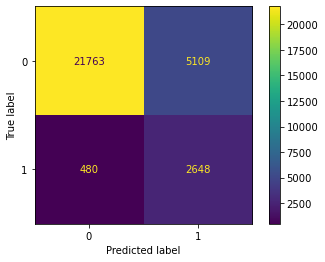

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=classifier.classes_)
disp.plot()

plt.show()

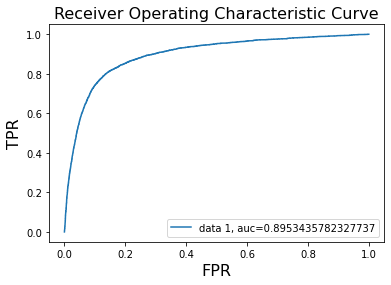

In [112]:
import sklearn.metrics as metrics

y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)

###plt.plot(np.linspace(0, 1, 100),
  ##       np.linspace(0, 1, 100),
    ##     label='baseline',
      ##   linestyle='--')




plt.legend(loc=4)
plt.show()


In [113]:
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


AUC: 0.8953435782327737


### complex models

#### DT model

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_tr, y_tr)


DecisionTreeClassifier(max_depth=5)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
x_test = pd.DataFrame(data=x_test)
y_pred = dt.predict(x_test)

# Printing classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.87      0.92     26872
           1       0.43      0.82      0.56      3128

    accuracy                           0.87     30000
   macro avg       0.70      0.85      0.74     30000
weighted avg       0.92      0.87      0.88     30000



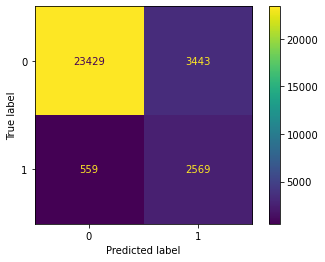

In [116]:
#print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=dt.classes_)
disp.plot()

plt.show()

In [117]:
print(accuracy_score(y_test, y_pred))

0.8666


In [118]:
print("AUC: ", roc_auc_score(y_test, y_pred))



AUC:  0.8465828148829461


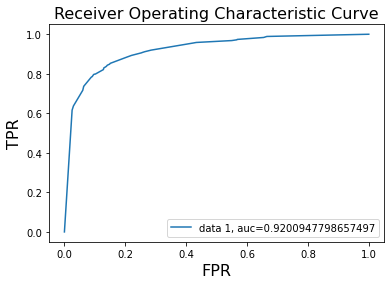

In [119]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(loc=4)
plt.show()


#### RandomForest model

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier()
rf.fit(x_tr, y_tr)

# Make predictions
prediction_test = rf.predict(x_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))


Randon Forest Accuracy with Default Hyperparameter 0.9302333333333334


In [121]:
print("AUC: ", roc_auc_score(y_test, prediction_test))



AUC:  0.851030298796454


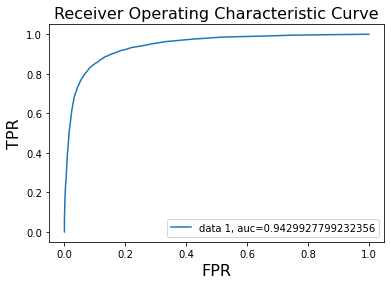

In [122]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(loc=4)
plt.show()



[[25558  1314]
 [  779  2349]]


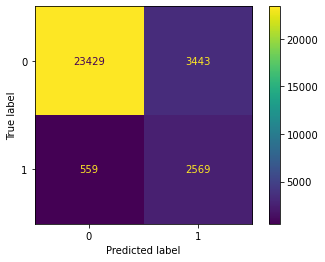

In [123]:
print(confusion_matrix(y_test,prediction_test))
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=rf.classes_)
disp.plot()

plt.show()


In [124]:
#conda install -c conda-forge xgboost


#### Xgboost model

In [125]:
from xgboost import XGBClassifier

import numpy as np

#model=XGBClassifier(random_state=1,learning_rate=0.01)

#model.fit(x_train, y_tr)
#model.score(x_test,y_test)
x_train = np.array(x_tr)
x_test = np.array(x_test)

#model.score(x_test,y_test)


model = XGBClassifier()
model.fit(x_train, y_tr)


#model.fit(x_tr, y_tr)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
pred_test = model.predict(x_test)
metrics.accuracy_score(y_test, pred_test)

0.9382666666666667

In [127]:
print("AUC: ", roc_auc_score(y_test, pred_test))



AUC:  0.8209107646061389


In [128]:
print(confusion_matrix(y_test,pred_test))

[[26044   828]
 [ 1024  2104]]


In [129]:
pd.DataFrame(confusion_matrix(y_test, pred_test),
             columns =['Predicted positive', "Predicted negitive"], index =['Actual positive', 'Actual negative'])


Predicted positive  Predicted negitive
Actual positive               26044                 828
Actual negative                1024                2104

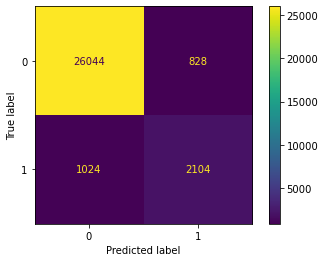

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=model.classes_)
disp.plot()

plt.show()


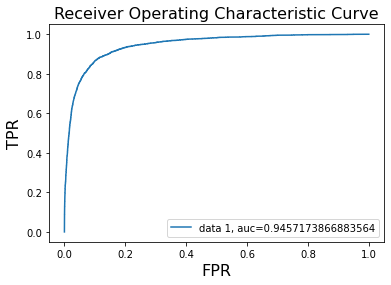

In [131]:
import sklearn.metrics as metrics

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(loc=4)
plt.show()



# Hyperparameter Tuning:

#### This is the  process of determining the right combination of hyperparameters that allows the model to maximize model performance.
Setting the correct combination of hyperparameters is the only way to extract the maximum performance out of models

#### Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import time
start_time = time.time()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                               random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(x_tr, y_tr)
end_time = time.time()
print("total time:",end_time - start_time)
search.best_params_
#{'C': '2...', 'penalty': 'l1'}

total time: 384.02885246276855


{'C': 0.22685190926977272, 'penalty': 'l2'}

In [133]:
y_pred = clf.predict(x_test)

print('Accuracy of Logistic Regression Model on test set is ',clf.score(x_test, y_test))




Accuracy of Logistic Regression Model on test set is  0.8081666666666667


In [134]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

print("AUC: ", roc_auc_score(y_test, y_pred))



Accuracy :  0.8081666666666667
AUC:  0.8245582067948916


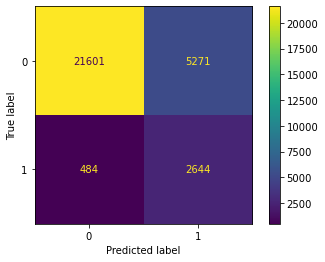

In [135]:
cm = confusion_matrix(y_test, y_pred, labels=search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=search.classes_)
disp.plot()

plt.show()

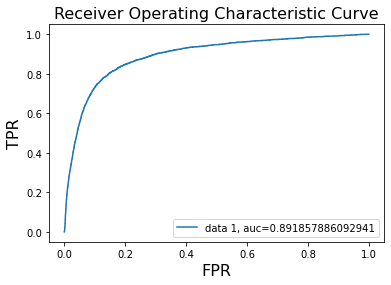

In [136]:
import sklearn.metrics as metrics

y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)

plt.legend(loc=4)
plt.show()




### DecisionTree

In [137]:
# GridSearchCV with  optimal parameters

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# parameters to build model
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# no of folds for k-fold cv
n_folds = 5

#  the grid search model
dtree = DecisionTreeClassifier()

#fit dtree on training data
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_tr, y_tr)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [138]:
print("Best Accuracy", grid_search.best_score_)


Best Accuracy 0.908343582370771


In [139]:
print(grid_search.best_estimator_)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50)


In [140]:
# model with optimal hyperparameters
import time
start_time = time.time()

clf_gini = DecisionTreeClassifier(criterion = 'gini',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
print(clf_gini.fit(x_tr, y_tr))
end_time = time.time()
print("total time:",end_time - start_time)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)
total time: 9.125579833984375


In [141]:
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(x_test,y_test))


Accuracy Score for Decision Tree Final Model : 0.8803


In [142]:
y_pred = clf_gini.predict(x_test)
print("AUC: ", roc_auc_score(y_test, y_pred))

print ("Accuracy : ", accuracy_score(y_test, y_pred))



AUC:  0.8522528227025306
Accuracy :  0.8803


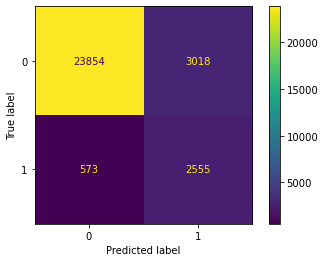

In [144]:
cm = confusion_matrix(y_test, y_pred, labels=clf_gini.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=clf_gini.classes_)
disp.plot()

plt.show()

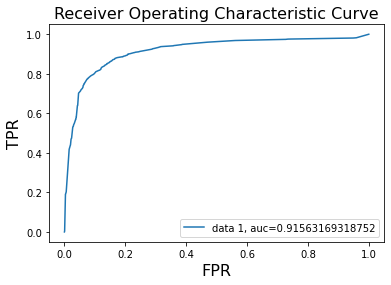

In [145]:
y_pred_proba = clf_gini.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)

plt.legend(loc=4)
plt.show()


### XGB model

In [146]:
import xgboost as xgb 
from xgboost.sklearn import XGBClassifier



param_grid = {
    'n_estimators' : [ 200],
    'learning_rate' : [  0.1, 0.2, 0.3],
    'max_depth' : [2],
    'sub_sample' : [0.2,0.3,0.4]
}
xgb = xgb.XGBClassifier()


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='roc_auc',verbose = 1,n_jobs = -1)

grid_search.fit(x_tr, y_tr)


#search.best_params_



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[00:02:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [147]:
print(grid_search.best_params_)

{'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200, 'sub_sample': 0.2}


In [148]:
# model with optimal hyperparameters
import time
start_time = time.time()

clf = XGBClassifier( max_depth=2,
                     learning_rate = 0.3,
                    n_estimators = 200,
                   sub_sample = 0.2)
print(clf.fit(x_tr, y_tr))
end_time = time.time()
print("total time:",end_time - start_time)



[00:03:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, sub_sample=0.2,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
total ti

In [168]:
print(" xgboost AUC score on training data:",clf.score(x_tr,y_tr))

 xgboost AUC score on training data: 0.9969890047031905


In [169]:
y_predict = clf.predict(x_test)
#print(y_predict)
print('Accuracy: {}'.format(accuracy_score(y_test, y_predict)))
print(confusion_matrix(y_test,y_predict))


Accuracy: 0.9290333333333334
[[25503  1369]
 [  760  2368]]


In [170]:
print("AUC: ", roc_auc_score(y_test, y_predict))

#print ("Accuracy : ", accuracy_score(y_test, y_pred))



AUC:  0.8530440131448207


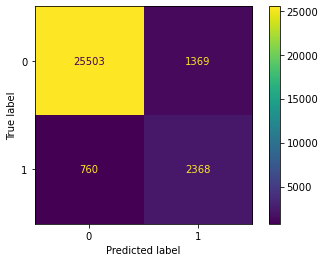

In [171]:
cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=clf.classes_)
disp.plot()

plt.show()

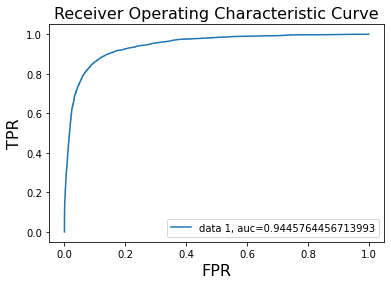

In [172]:
import sklearn.metrics as metrics

y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)

plt.legend(loc=4)
plt.show()



#### RF Model

In [ ]:
#'min_samples_leaf': range(1, 100,10),
 #   'min_samples_split': range(10,100,10),
   # 'n_estimators':  range(100, 2000, 200) ,
    #'max_features': [20,30,40,50,60]
  

In [173]:
# model with optimal hyperparameters
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import time
start_time = time.time()

clf = RandomForestClassifier(max_depth=32, max_features=30,
                             n_estimators=300)



print(clf.fit(x_tr, y_tr))

end_time = time.time()
print("total time:",end_time - start_time)



RandomForestClassifier(max_depth=32, max_features=30, n_estimators=300)
total time: 790.741747379303


In [174]:
print(" RF AUC score on training data:",clf.score(x_tr,y_tr))

 RF AUC score on training data: 0.9968539468666582


In [175]:
y_pred = clf.predict(x_test)

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))



Accuracy: 0.9292333333333334


In [176]:
print("AUC: ", roc_auc_score(y_test, y_pred))


AUC:  0.8540030924287081


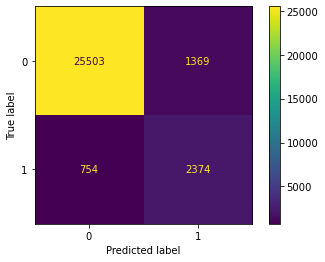

In [177]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=clf.classes_)
disp.plot()

plt.show()

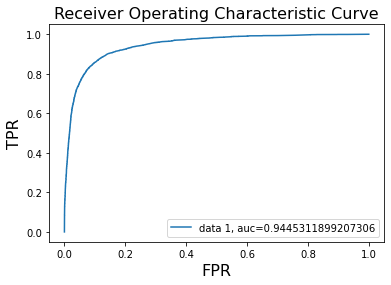

In [178]:
#import sklearn.metrics as metrics

y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)

plt.legend(loc=4)
plt.show()



### combination of various models:

### svc and RF

In [179]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


# group / ensemble of models
estimator = []
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('RF', RandomForestClassifier(max_depth=32, max_features=30,
                             n_estimators=300)))

  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_tr, y_tr)
y_pred = vot_hard.predict(x_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)


Hard Voting Score  0


In [180]:
print("AUC: ", roc_auc_score(y_test, y_pred))


AUC:  0.8347395134193056


In [182]:
# Voting Classifier with soft voting
start_time = time.time()

vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_tr, y_tr)
y_pred = vot_soft.predict(x_test)
  
# using accuracy_score
end_time = time.time()
print("total time:",end_time - start_time)

score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)


total time: 9564.138417005539
Soft Voting Score  0


In [183]:
print("AUC: ", roc_auc_score(y_test, y_pred))


AUC:  0.8601794316753326


#### observation:

 The combination of SVC and Randomforest model with soft voting classifier gives roc_auc_scor of 0.860

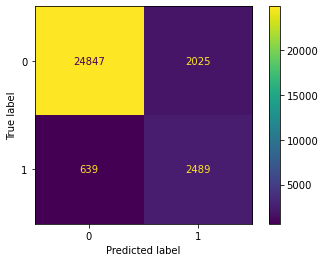

In [184]:
cm = confusion_matrix(y_test, y_pred, labels=vot_soft.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=vot_soft.classes_)
disp.plot()



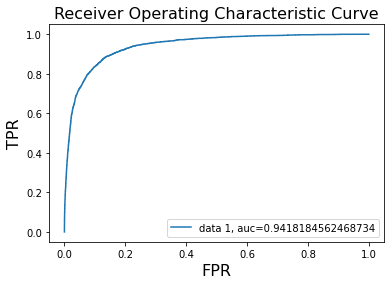

In [185]:
#import sklearn.metrics as metrics

y_pred_proba = vot_soft.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)

plt.legend(loc=4)
plt.show()


### XGB and LR models

In [186]:
from sklearn.ensemble import VotingClassifier

start_time = time.time()

# group / ensemble of models
estimator = []

estimator.append(('XGB',XGBClassifier( max_depth=2,
                     learning_rate = 0.3,
                    n_estimators = 200,
                   sub_sample = 0.2)))
estimator.append(('LR', LogisticRegression(solver ='saga', 
                                     max_iter = 200)))


            

  
# Voting Classifier with hard voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_tr, y_tr)

end_time = time.time()
print("total time:",end_time - start_time)

y_pred = vot_soft.predict(x_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("soft Voting Score % d" % score)


[13:20:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


total time: 82.06881332397461
soft Voting Score  0


D:\bhavagna\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [187]:
print("AUC: ", roc_auc_score(y_test, y_pred))


AUC:  0.8488566427256925


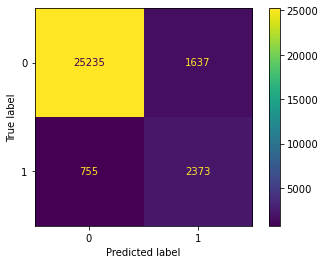

In [188]:
cm = confusion_matrix(y_test, y_pred, labels=vot_soft.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=vot_soft.classes_)
disp.plot()


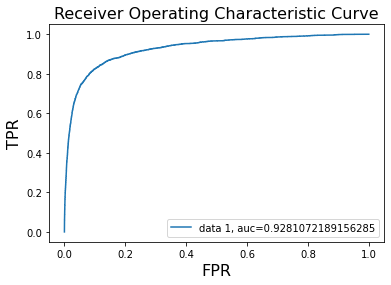

In [189]:
#import sklearn.metrics as metrics

y_pred_proba = vot_soft.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)

plt.legend(loc=4)
plt.show()


#### observation:

 The combination of XGboost and Logistic regression with soft voting classifier gives roc_auc_score of 0.849.

### XGB and RF models

In [190]:
from sklearn.ensemble import VotingClassifier

# group / ensemble of models
estimator = []

estimator.append(('XGB',XGBClassifier( max_depth=2,
                     learning_rate = 0.3,
                    n_estimators = 200,
                   sub_sample = 0.2)))
estimator.append(('RF', RandomForestClassifier(max_depth=32, max_features=30,
                             n_estimators=300)))


            
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
print(vot_soft.fit(x_tr, y_tr))
  
end_time = time.time()
print("total time:",end_time - start_time)


[13:21:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.3,
                                            max_delta_step=None, max

In [191]:
# Voting Classifier with soft voting

y_pred = vot_soft.predict(x_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("soft Voting Score % d" % score)


soft Voting Score  0


In [192]:
print("AUC: ", roc_auc_score(y_test, y_pred))


AUC:  0.8425491998059951


#### observation:

 The combination of XGboost and Random forest models withe soft voting classifier gives roc_auc_score of 0.844.

#### confusion matrix

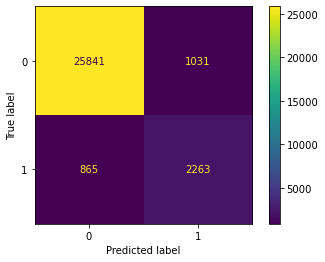

In [193]:
cm = confusion_matrix(y_test, y_pred, labels=vot_soft.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=vot_soft.classes_)
disp.plot()


#### ROC_AUC curve

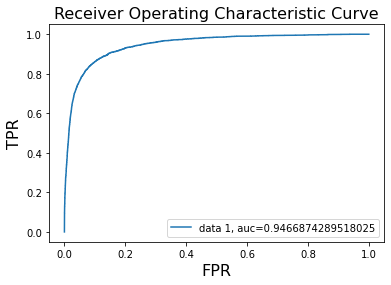

In [194]:
#import sklearn.metrics as metrics

y_pred_proba = vot_soft.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)

plt.legend(loc=4)
plt.show()


#### comparison of models

In [195]:
# compare the models by using the following pretty table
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "default params", "hyperparameters", "accuracy","Test AUC"]

x.add_row(["Dummy classifier", 'y', 'N',0.49, 0.498])
x.add_row(["logistic regression", 'y', 'N',0.8131,0.8282])
x.add_row([" Randomforest", 'y','N', 0.9312,0.8522])
x.add_row(["Deciscion Tree ", 'y', 'N', 0.8666,0.8803])
x.add_row([" Xgboost", 'y', 'N',0.916,0.93])

x.add_row(["--------",'--','--','---','--'])

x.add_row(["LR", 'N', 'Y',0.8081,0.8245])
x.add_row([" RF Model",'N', 'Y',0.92,0.85])
x.add_row(["DT model ", 'N','y',0.8803,0.8522])
x.add_row([" XGB", 'N', 'y',0.93,0.945])

x.add_row(["----------"'----','---','-----','----','----'])


x.add_row(["SVC+RF",'N','Y','--',0.944])
x.add_row(["XGB+LR",'N','Y','--',0.944])
x.add_row(["XGB+RF",'N','Y','--',0.946])



print(x)


+---------------------+----------------+-----------------+----------+----------+
|        Model        | default params | hyperparameters | accuracy | Test AUC |
+---------------------+----------------+-----------------+----------+----------+
|   Dummy classifier  |       y        |        N        |   0.49   |  0.498   |
| logistic regression |       y        |        N        |  0.8131  |  0.8282  |
|     Randomforest    |       y        |        N        |  0.9312  |  0.8522  |
|   Deciscion Tree    |       y        |        N        |  0.8666  |  0.8803  |
|        Xgboost      |       y        |        N        |  0.916   |   0.93   |
|       --------      |       --       |        --       |   ---    |    --    |
|          LR         |       N        |        Y        |  0.8081  |  0.8245  |
|       RF Model      |       N        |        Y        |   0.92   |   0.85   |
|      DT model       |       N        |        y        |  0.8803  |  0.8522  |
|          XGB        |     

#### observation:

 By observingthe above  models  xgboost with hyperparameters and XGB+RF with hyperparameters  give best AUC. But interpretability of RF is very hard. So we choose xgboost with hyperparameters.

### Ablation analysis:

 Remove some features from data and apply model on remaining data and observe results..

In [196]:
# Remove 1st 50 features from train and test data
x_train = x_tr[:,50:]
y_train = y_tr
print(x_train.shape)
print(y_train.shape)

(125872, 76)
(125872,)


In [197]:
x_test = np.array(x_test)
x_test1 = x_test[:,50:]

In [198]:
print(x_test1.shape)

(30000, 76)


In [199]:
clf = XGBClassifier( max_depth=2,
                     learning_rate = 0.3,
                    n_estimators = 200,
                   sub_sample = 0.2)
clf.fit(x_train, y_train)


[13:42:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, sub_sample=0.2,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [200]:
y_pred = clf.predict(x_test1)

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.9353333333333333


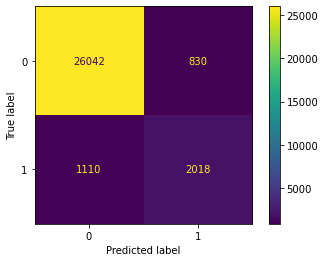

In [201]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=clf.classes_)
disp.plot()

plt.show()

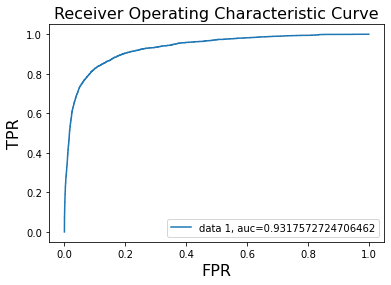

In [202]:
import sklearn.metrics as metrics

y_pred_proba = clf.predict_proba(x_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)

plt.legend(loc=4)
plt.show()


In [ ]:
print("AUC",roc_auc_score(y_test, y_predict))

#### observation:

After removing the 1 st 50 features the Xgboost model gives roc_auc_score of 0.82.

In [203]:
# Remove last 46 features and apply model
x_train = x_tr[:,:80]
y_train = y_tr
print(x_train.shape)
print(y_train.shape)

(125872, 80)
(125872,)


In [204]:
x_test3 = x_test[:,:80]
x_test3.shape

(30000, 80)

In [205]:
clf = XGBClassifier( max_depth=2,
                     learning_rate = 0.3,
                    n_estimators = 200,
                   sub_sample = 0.2)
clf.fit(x_train, y_train)


[13:43:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, sub_sample=0.2,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [206]:
y_pred = clf.predict(x_test3)

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.9346


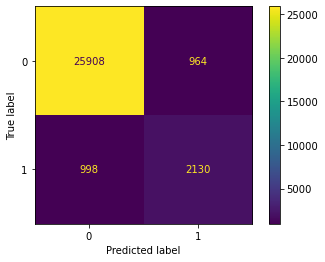

In [207]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=clf.classes_)
disp.plot()

plt.show()

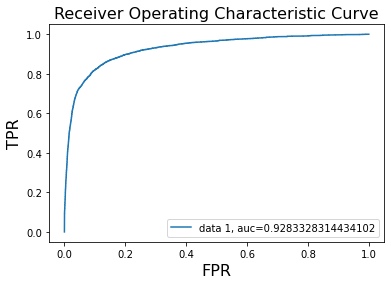

In [208]:
import sklearn.metrics as metrics

y_pred_proba = clf.predict_proba(x_test3)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)

plt.legend(loc=4)
plt.show()


In [209]:
print("AUC",roc_auc_score(y_test,y_pred))

AUC 0.8225362598020816


In [210]:
# Remove alternate features
x_train = x_tr[:,::2]
y_train = y_tr
print(x_train.shape)
print(y_train.shape)

(125872, 63)
(125872,)


In [211]:
clf = XGBClassifier( max_depth=2,
                     learning_rate = 0.3,
                    n_estimators = 200,
                   sub_sample = 0.2)
clf.fit(x_train, y_train)


[13:43:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, sub_sample=0.2,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [212]:
x_test2 = x_test[:,::2]

In [213]:
x_test2.shape

(30000, 63)

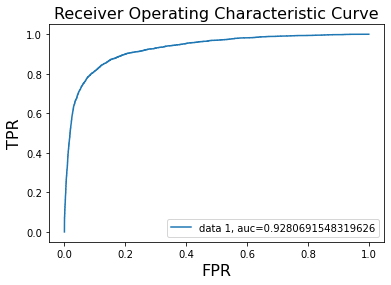

In [214]:
#import sklearn.metrics as metrics

y_pred_proba = clf.predict_proba(x_test2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)

plt.legend(loc=4)
plt.show()


#### observations:

In ablation analysis by removing last last few rows the model performance is decreased. 
This means that the removed features have some importance in predicting the churned customers.

### Trained model

In [256]:
df_model = churn_data[:].copy()


In [257]:
df_model.shape

(99999, 128)

In [273]:
df_model.drop(['mobile_number','churn'], axis = 1, inplace = True)

In [258]:
X.shape

(99999, 126)

In [267]:
x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)


In [268]:
sm = SMOTE(random_state=42)
x_tr,y_tr = sm.fit_resample(x_train,y_train)


In [289]:
x_tr.shape
#y_tr.shape

(125872, 126)

In [290]:
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import time
start_time = time.time()
import time
start_time = time.time()
model = XGBClassifier( max_depth=2,
                     learning_rate = 0.3,
                    n_estimators = 200,
                   sub_sample = 0.2)
model.fit(x_tr, y_tr)

end_time = time.time()
print("total time:",end_time - start_time)




[15:44:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


total time: 37.253307819366455


### Feature importance:

#### feature_importanceIn ablation analysis by removing last last few rows the model performance is decreased. 
This means that the removed features have some importance in predicting the churned customers.

In [291]:
# feature_importance
importance = model.feature_importances_

#print(importance)
# create dataframe
feature_importance = pd.DataFrame({'variables': df_model.columns, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00001


variables  importance_percentage
0           loc_ic_mou_t_8              19.483173
1           total_ic_mou_8              16.475229
2            roam_og_mou_8              12.582235
3                arpu_diff               3.026989
4         total_rech_amt_8               2.957111
5             loc_ic_mou_8               2.827371
6       last_day_rch_amt_8               2.708397
7            roam_ic_mou_8               2.172770
8          count_rech_2g_8               2.139658
9         last_rech_date_8               1.685306
10            spl_ic_mou_8               1.602809
11            spl_og_mou_7               1.500584
12        last_rech_date_6               1.405714
13             ic_others_7               1.205353
14          max_rech_amt_6               1.152624
15        last_rech_date_7               1.142447
16          max_rech_amt_8               1.140201
17            isd_og_mou_8               1.058161
18         max_rech_data_8               0.997634
19         count_rech_2g_6               0.896433
20                     aon               0.894403
21            loc_ic_mou_6               0.831266
22           roam_og_mou_6               0.817179
23             og_others_6               0.756988
24   last_data_rech_date_8               0.753376
25            isd_ic_mou_6               0.728347
26        total_rech_num_6               0.726432
27            std_og_mou_6               0.720765
28          max_rech_amt_7               0.679194
29            isd_og_mou_7               0.673019
30      last_day_rch_amt_6               0.664987
31        total_rech_num_8               0.658013
32        total_rech_num_7               0.656542
33            std_ic_mou_7               0.556916
34         count_rech_2g_7               0.518575
35      last_day_rch_amt_7               0.514724
36           roam_ic_mou_6               0.506390
37            std_og_mou_7               0.481774
38            offnet_mou_6               0.480039
39            spl_og_mou_6               0.468522
40              sep_vbc_3g               0.462065
41             ic_others_6               0.424327
42            spl_ic_mou_6               0.408764
43         count_rech_3g_8               0.396183
44               fb_user_8               0.385142
45   last_data_rech_date_7               0.379943
46            spl_ic_mou_7               0.365917
47                  arpu_6               0.340919
48            spl_og_mou_8               0.340344
49            loc_ic_mou_7               0.336783
50         count_rech_3g_6               0.315225
51            std_ic_mou_6               0.290312
52              aug_vbc_3g               0.256384
53            isd_ic_mou_8               0.256346
54            std_ic_mou_8               0.236545
55            std_og_mou_8               0.221483
56             onnet_mou_6               0.177121
57                  arpu_7               0.171881
58              jun_vbc_3g               0.171071
59           roam_ic_mou_7               0.157778
60        avg_rech_amt_6_7               0.151567
61          loc_ic_mou_t_7               0.149529
62             sachet_2g_6               0.141588
63          total_og_mou_7               0.136820
64          total_og_mou_8               0.124493
65            loc_og_mou_8               0.119180
66            loc_og_mou_7               0.117152
67             vol_2g_mb_8               0.108070
68             ic_others_8               0.103767
69             vol_3g_mb_7               0.099496
70            offnet_mou_8               0.097890
71             vol_2g_mb_6               0.088082
72                  arpu_8               0.086497
73         max_rech_data_7               0.085821
74          total_ic_mou_6               0.085801
75             onnet_mou_7               0.080151
76             onnet_mou_8               0.077324
77          total_ic_mou_7               0.074881
78            offnet_mou_7               0.073494
79          loc_o

In [294]:
top_n = 30
top_features = feature_importance.variables[0:top_n]
top_features.values

array(['loc_ic_mou_t_8', 'total_ic_mou_8', 'roam_og_mou_8', 'arpu_diff',
       'total_rech_amt_8', 'loc_ic_mou_8', 'last_day_rch_amt_8',
       'roam_ic_mou_8', 'count_rech_2g_8', 'last_rech_date_8',
       'spl_ic_mou_8', 'spl_og_mou_7', 'last_rech_date_6', 'ic_others_7',
       'max_rech_amt_6', 'last_rech_date_7', 'max_rech_amt_8',
       'isd_og_mou_8', 'max_rech_data_8', 'count_rech_2g_6', 'aon',
       'loc_ic_mou_6', 'roam_og_mou_6', 'og_others_6',
       'last_data_rech_date_8', 'isd_ic_mou_6', 'total_rech_num_6',
       'std_og_mou_6', 'max_rech_amt_7', 'isd_og_mou_7'], dtype=object)

In [ ]:
x_tr = pd.DataFrame(x_tr, columns = df_model.columns)
x_tr

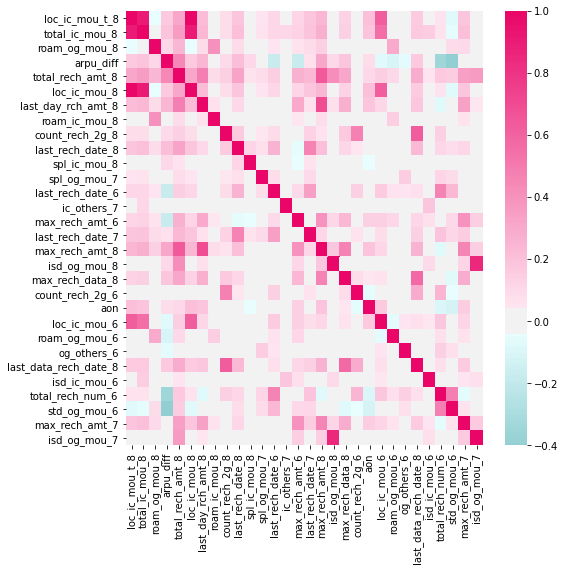

In [295]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(8,8)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=x_tr[top_features].corr(), center=0.0, cmap=mycmap)


In [298]:

top_features = ['loc_ic_mou_t_8','total_ic_mou_8', 'roam_og_mou_8','arpu_diff',
                'total_rech_amt_8', 'loc_ic_mou_8','last_rech_date_8', 'roam_ic_mou_8','count_rech_2g_8' ]
x_out = x_tr[top_features]
#x_test = x_test[top_features]


In [299]:
x_out = np.array(x_out)
x_out.shape

(125872, 9)

In [300]:
model.fit(x_out, y_tr)

[15:55:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, sub_sample=0.2,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [301]:
# model with optimal hyperparameters
import time
start_time = time.time()
model = XGBClassifier( max_depth=2,
                     learning_rate = 0.3,
                    n_estimators = 200,
                   sub_sample = 1)
model.fit(x_out, y_tr)

end_time = time.time()
print("total time:",end_time - start_time)

[15:55:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


total time: 4.6977219581604


In [308]:
x_test.shape

(30000, 126)

In [312]:
x_test = pd.DataFrame(x_test, columns = df_model.columns)


In [318]:
x_test = x_test[top_features]
x_test.head()

loc_ic_mou_t_8  total_ic_mou_8  roam_og_mou_8  arpu_diff  total_rech_amt_8  \
0       -0.501051       -0.541860      -0.149798   0.857043          0.830279   
1       -0.643664       -0.686959      -0.149798  -0.655465         -0.778217   
2        0.013938       -0.027792      -0.149798   0.070713         -0.432510   
3       -0.444616       -0.517631      -0.149798  -0.177836         -0.706195   
4       -0.465256       -0.509266      -0.149798   0.121606         -0.538143   

   loc_ic_mou_8  last_rech_date_8  roam_ic_mou_8  count_rech_2g_8  
0     -0.501041          0.721892      -0.103681        -0.320977  
1     -0.643693          0.456432      -0.103681        -0.320977  
2      0.013944          0.058241      -0.103681        -0.320977  
3     -0.444647          0.323702      -0.103681        -0.320977  
4     -0.465287         -0.074489      -0.103681        -0.320977

In [319]:
x_test = np.array(x_test)

### Saving the trained model

In [320]:
import joblib
joblib.dump(model,'r_model.pkl')

['r_model.pkl']

#### Load the trained model

In [321]:
import joblib
# Load the model from the file 
loaded_model = joblib.load('r_model.pkl') 
# Use the loaded model to make predictions
response_model = loaded_model.predict(x_test)
response_model.shape

(30000,)

#### Evaluation of the loaded model

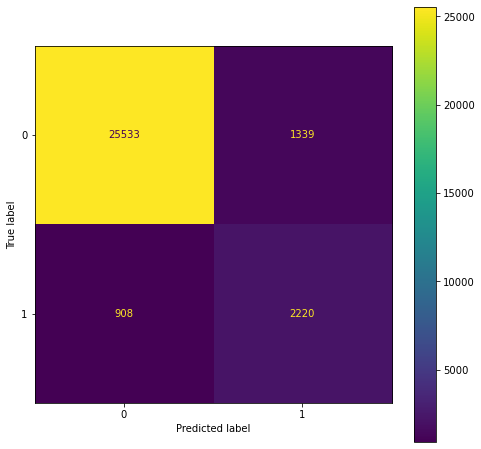

ROC:    	 0.93


In [322]:
# predict churn on test data
y_pred_load = loaded_model.predict(x_test)#.reshape(-1,1))
#print(y_pred_load)
# create onfusion matrix
cm_matrix = confusion_matrix(y_test, y_pred_load)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_matrix,  
                              display_labels=model.classes_)
disp.plot()

plt.show()

# check area under curve
y_pred_prob_load = loaded_model.predict_proba(x_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob_load),2))


#### Evaluation of trained model object

Accuracy: 0.9251


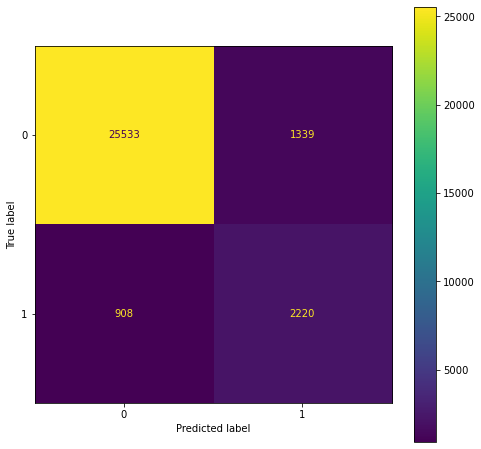

ROC:    	 0.93


In [326]:
y_predict = model.predict(x_test)
print('Accuracy: {}'.format(accuracy_score(y_test, y_predict)))
cm = confusion_matrix(y_test, y_predict)

#print(confusion_matrix(y_test,y_predict))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=model.classes_)
disp.plot()

plt.show()

# check area under curve
y_pred_prob_load = model.predict_proba(x_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob_load),2))
